<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Regressão Linear</h1>

# <font color='red' style='font-size: 30px;'>Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## Importando bibliotecas

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

## O Dataset e o Projeto
<hr>

### Fonte: https://www.kaggle.com/greenwing1985/housepricing

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Nosso objetivo neste exercício é criar um modelo de machine learning, utilizando a técnica de Regressão Linear, que faça previsões sobre os preços de imóveis a partir de um conjunto de características conhecidas dos imóveis.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Vamos utilizar um dataset disponível no Kaggle que foi gerado por computador para treinamento de machine learning para iniciantes. Este dataset foi modificado para facilitar o nosso objetivo, que é fixar o conhecimento adquirido no treinamento de Regressão Linear.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Siga os passos propostos nos comentários acima de cada célula e bons estudos.</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>precos</b> - Preços do imóveis</li>
    <li><b>area</b> - Área do imóvel</li>
    <li><b>garagem</b> - Número de vagas de garagem</li>
    <li><b>banheiros</b> - Número de banheiros</li>
    <li><b>lareira</b> - Número de lareiras</li>
    <li><b>marmore</b> - Se o imóvel possui acabamento em mármore branco (1) ou não (0)</li>
    <li><b>andares</b> - Se o imóvel possui mais de um andar (1) ou não (0)</li>
</ul>

## Leitura dos dados

Dataset está na pasta "Dados" com o nome "HousePrices_HalfMil.csv" e usa como separador ";".

In [7]:
db = pd.read_csv('./dados/HousePrices_HalfMil.csv', sep=';')

## Visualizar os dados

In [10]:
db.head() #visualizando os 5 primeiros registros

,precos,area,garagem,banheiros,lareira,marmore,andares
0,51875,25,3,4,3,0,1
1,17875,35,1,3,1,0,0
2,47075,195,2,4,2,0,0
3,38575,33,2,2,1,0,1
4,33775,11,2,3,0,0,1


## Verificando o tamanho do dataset

In [73]:
db.shape

(1000, 7)

# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [12]:
db.describe().round()

,precos,area,garagem,banheiros,lareira,marmore,andares
count,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
mean,41986.0,124.0,2.0,3.0,2.0,0.0,0.0
std,12140.0,72.0,1.0,1.0,1.0,0.0,1.0
min,13150.0,1.0,1.0,1.0,0.0,0.0,0.0
25%,33112.0,61.0,1.0,2.0,1.0,0.0,0.0
50%,41725.0,123.0,2.0,3.0,2.0,0.0,0.0
75%,51175.0,187.0,3.0,4.0,3.0,1.0,1.0
max,73675.0,249.0,3.0,5.0,4.0,1.0,1.0


## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

### Observe as correlações entre as variáveis:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>Quais são mais correlacionadas com a variável dependete (Preço)?</li>
    <p> marmore, adares</p>
    <li>Qual o relacionamento entre elas (positivo ou negativo)?</li>
    <p> positivo</p>
    <li>Existe correlação forte entre as variáveis explicativas?</li>
    <p> não</p>
</ul>

In [13]:
db.corr().round(2)

,precos,area,garagem,banheiros,lareira,marmore,andares
precos,1.00,0.12,0.10,0.12,0.11,0.43,0.63
area,0.12,1.00,-0.01,-0.01,0.01,-0.02,-0.02
garagem,0.10,-0.01,1.00,0.07,0.06,-0.02,-0.02
banheiros,0.12,-0.01,0.07,1.00,0.05,-0.03,-0.02
lareira,0.11,0.01,0.06,0.05,1.00,0.03,-0.00
marmore,0.43,-0.02,-0.02,-0.03,0.03,1.00,-0.01
andares,0.63,-0.02,-0.02,-0.02,-0.00,-0.01,1.00


# <font color='red' style='font-size: 30px;'>Comportamento da Variável Dependente (Y)</font>
<hr style='border: 2px solid red;'>

# Análises gráficas

<img width='700px' src='../Dados/img/Box-Plot.png'>

## Importando biblioteca seaborn

In [17]:
import seaborn as sns

## Configure o estilo e cor dos gráficos (opcional)

In [21]:
sns.set_palette("rocket")
sns.set_style("darkgrid")

## Box plot da variável *dependente* (y)


### Avalie o comportamento da distribuição da variável dependente:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>Parecem existir valores discrepantes (outliers)?</li>
    <p>não temos outliers</p>
    <li>O box plot apresenta alguma tendência?</li>
    não
</ul>

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

Text(0, 0.5, '$')

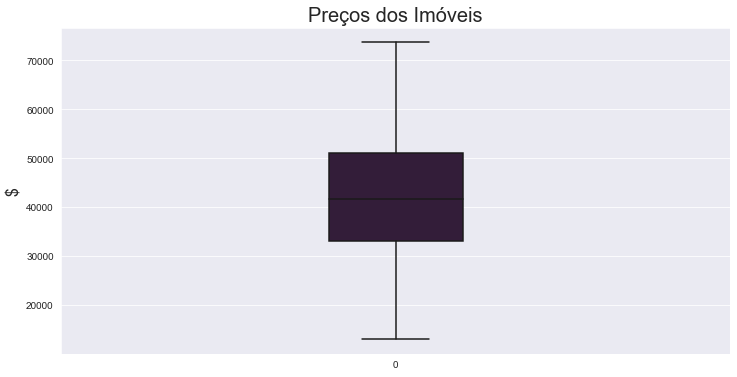

In [66]:
ax = sns.boxplot(data=db['precos'], orient='v', width=0.2)

ax.figure.set_size_inches(12, 6)
ax.set_title('Preços dos Imóveis', fontsize=20)
ax.set_ylabel('$', fontsize=16)

## Investigando a variável *dependente* (y) juntamente com outras característica

Faça um box plot da variável dependente em conjunto com cada variável explicativa (somente as categóricas).

### Avalie o comportamento da distribuição da variável dependente com cada variável explicativa categórica:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>As estatísticas apresentam mudança significativa entre as categorias?</li>
    <p>para marmore e andares, sim</p>
    <li>O box plot apresenta alguma tendência bem definida?</li>
    <p>marmore e andares</p>
</ul>

### Box-plot (Preço X Garagem)

Text(0.5, 0, 'Número de Vagas na Garagem')

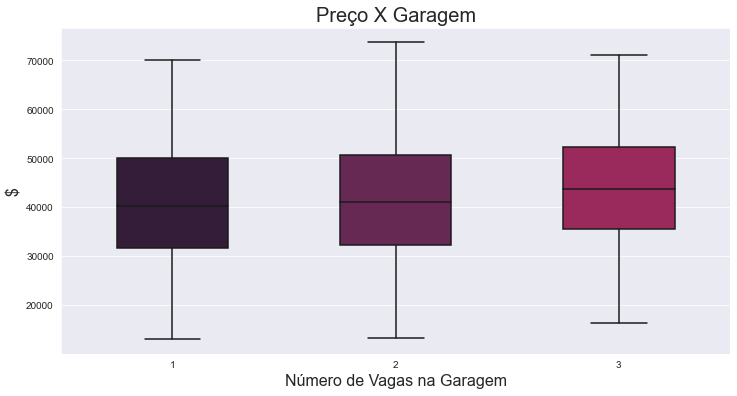

In [65]:
ax = sns.boxplot(y='precos', x='garagem', data = db, orient='v', width=0.5)

ax.figure.set_size_inches(12, 6)
ax.set_title('Preço X Garagem', fontsize=20)
ax.set_ylabel('$', fontsize=16)
ax.set_xlabel('Número de Vagas na Garagem', fontsize=16)

### Box-plot (Preço X Banheiros)

Text(0.5, 0, 'Número de Banheiros')

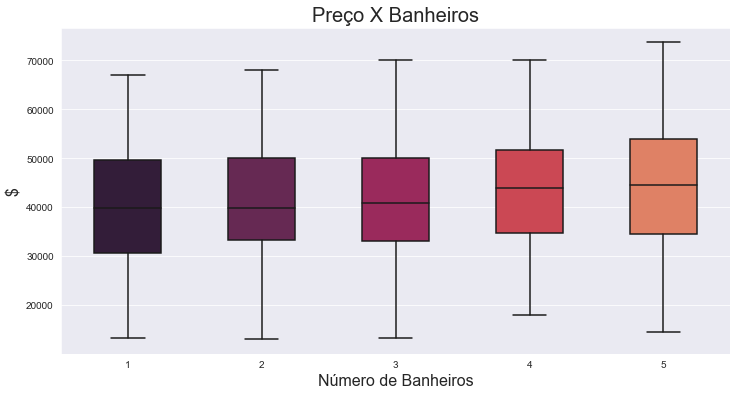

In [64]:
ax = sns.boxplot(y='precos', x='banheiros', data = db, orient='v', width=0.5)

ax.figure.set_size_inches(12, 6)
ax.set_title('Preço X Banheiros', fontsize=20)
ax.set_ylabel('$', fontsize=16)
ax.set_xlabel('Número de Banheiros', fontsize=16)

### Box-plot (Preço X Lareira)

Text(0.5, 0, 'Número de Lareiras')

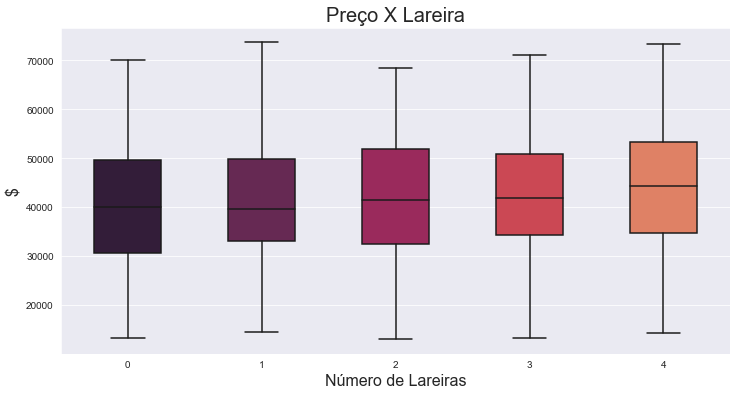

In [63]:
ax = sns.boxplot(y='precos', x='lareira', data = db, orient='v', width=0.5)

ax.figure.set_size_inches(12, 6)
ax.set_title('Preço X Lareira', fontsize=20)
ax.set_ylabel('$', fontsize=16)
ax.set_xlabel('Número de Lareiras', fontsize=16)

### Box-plot (Preço X Acabamento em Mármore)

Text(0.5, 0, '0: não possui mármore; 1: possui mármore')

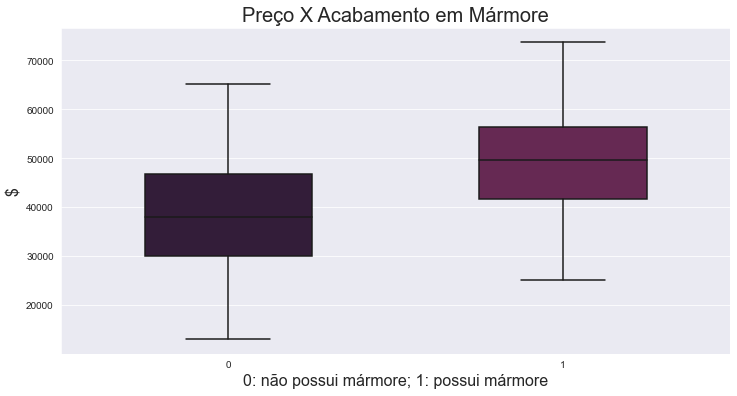

In [62]:
ax = sns.boxplot(y='precos', x='marmore', data = db, orient='v', width=0.5)

ax.figure.set_size_inches(12, 6)
ax.set_title('Preço X Acabamento em Mármore', fontsize=20)
ax.set_ylabel('$', fontsize=16)
ax.set_xlabel('0: não possui mármore; 1: possui mármore', fontsize=16)

### Box-plot (Preço X Andares)

Text(0.5, 0, '0: apenas um andar; 1: mais de um andar')

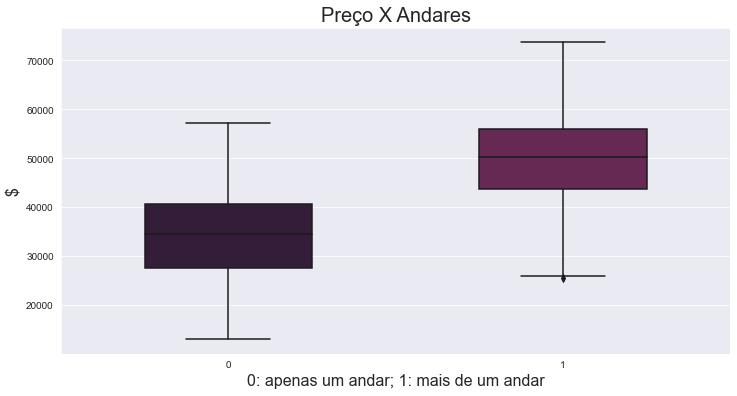

In [61]:
ax = sns.boxplot(y='precos', x='andares', data = db, orient='v', width=0.5)

ax.figure.set_size_inches(12, 6)
ax.set_title('Preço X Andares', fontsize=20)
ax.set_ylabel('$', fontsize=16)
ax.set_xlabel('0: apenas um andar; 1: mais de um andar', fontsize=16)

## Distribuição de frequências da variável *dependente* (y)

Construa um histograma da variável dependente (Preço).

### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>A distribuição de frequências da variável dependente parece ser assimétrica?</li>
    não
    <li>É possível supor que a variável dependente segue uma distribuição normal?</li>
    não da para tirar esse conclusão
</ul>

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

C:\Users\PALOMA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distrubuição de Frequências'}, xlabel='precos', ylabel='Preços dos Imóveis ($)'>

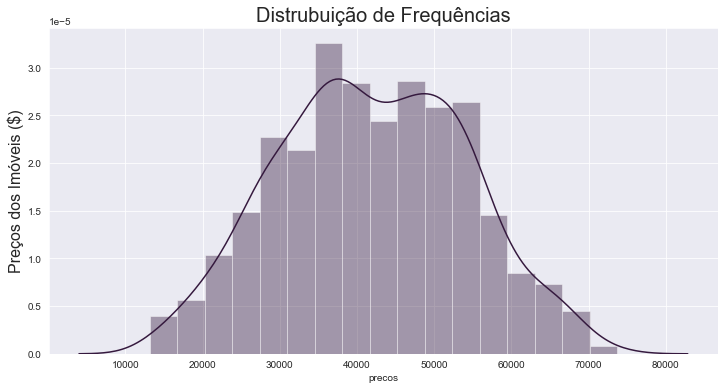

In [60]:
ax = sns.distplot(db['precos'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distrubuição de Frequências', fontsize=20)
ax.set_ylabel('Preços dos Imóveis ($)', fontsize=16)
ax

## Gráficos de dispersão entre as variáveis do dataset

## Plotando o pairplot fixando somente uma variável no eixo y

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

Plote gráficos de dispersão da variável dependente contra cada variável explicativa. Utilize o pairplot da biblioteca seaborn para isso.

Plote o mesmo gráfico utilizando o parâmetro kind='reg'.

### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>É possível identificar alguma relação linear entre as variáveis?</li>
    sim
    <li>A relação é positiva ou negativa?</li>
    <li>Compare com os resultados obtidos na matriz de correlação.</li>
</ul>

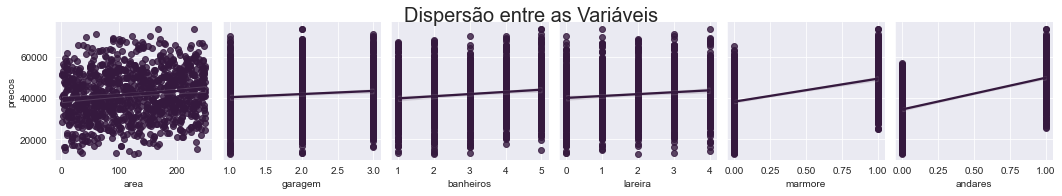

In [37]:
ax = sns.pairplot(db, y_vars='precos', x_vars=['area', 'garagem', 'banheiros', 'lareira', 'marmore', 'andares'], kind='reg')
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

# <font color='red' style='font-size: 30px;'>Estimando um Modelo de Regressão Linear</font>
<hr style='border: 2px solid red;'>

## Importando o *train_test_split* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [35]:
from sklearn.model_selection import train_test_split

## Criando uma Series (pandas) para armazenar a variável dependente (y)

In [40]:
y = db['precos']

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [41]:
X = db[['area', 'garagem', 'banheiros', 'lareira', 'marmore', 'andares']]

## Criando os datasets de treino e de teste

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

## Importando *LinearRegression* e *metrics* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Instanciando a classe *LinearRegression()*

In [44]:
model = LinearRegression()

## Utilizando o método *fit()* para estimar o modelo linear utilizando os dados de TREINO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [45]:
model.fit(X_train, y_train)

LinearRegression()

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score


### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>O modelo apresenta um bom ajuste?</li>
    não, está muito distante de 1
    <li>Você lembra o que representa o R²?</li>
    nos diz se o modelo está bem ajustado
    <li>Qual medida podemos tomar para melhorar essa estatística?</li>
    aumentar as variáveis
</ul>

In [46]:
print('R² = {}'.format(model.score(X_train, y_train).round(2)))

R² = 0.64


## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [47]:
y_prev = model.predict(X_test)

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [48]:
print('R² = %s' % metrics.r2_score(y_test, y_prev).round(2))

R² = 0.67


# <font color='red' style='font-size: 30px;'>Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

## Criando um simulador simples

Crie um simulador que gere estimativas de preço a partir de um conjunto de informações de um imóvel.

In [54]:
entrada = X_test[0:1]
entrada

,area,garagem,banheiros,lareira,marmore,andares
402,38,2,4,4,0,1


In [55]:
model.predict(entrada)[0]

46389.80475709244

In [71]:
area=38
garagem=2
banheiros=4
lareira=4
marmore=0
andares=1
entrada=[[area, garagem, banheiros, lareira, marmore, andares]]

print('$ {0:.2f}'.format(model.predict(entrada)[0]))

$ 46389.80


C:\Users\PALOMA\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# <font color='red' style='font-size: 30px;'>Métricas de Regressão</font>
<hr style='border: 2px solid red;'>

## Métricas da regressão
<hr>

fonte: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Algumas estatísticas obtidas do modelo de regressão são muito úteis como critério de comparação entre modelos estimados e de seleção do melhor modelo, as principais métricas de regressão que o scikit-learn disponibiliza para modelos lineares são as seguintes:

### Erro Quadrático Médio

Média dos quadrados dos erros. Ajustes melhores apresentam $EQM$ mais baixo.

$$EQM(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

### Raíz do Erro Quadrático Médio

Raíz quadrada da média dos quadrados dos erros. Ajustes melhores apresentam $\sqrt{EQM}$ mais baixo.

$$\sqrt{EQM(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$

### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

## Obtendo métricas para o modelo com Temperatura Máxima

In [72]:
EQM = metrics.mean_squared_error(y_test, y_prev).round(2)
REQM = np.sqrt(metrics.mean_squared_error(y_test, y_prev)).round(2)
R2 = metrics.r2_score(y_test, y_prev).round(2)

pd.DataFrame([EQM, REQM, R2], ['EQM', 'REQM', 'R²'], columns=['Métricas'])

,Métricas
EQM,50197019.50
REQM,7084.99
R²,0.67
